##Machine Learning I: WS 15/16 


#Exercise Sheet 1: Bayesian Decision Theory

In this programming assignment we will use Bayes' rule to build a simple junk-mail filter using data available at http://www.aueb.gr/users/ion/data/enron-spam/. **The code is already provided and your task is to focus on understanding the basic concepts of naive Bayes classifiers, running a few tests and explaining the observed behavior, not on understanding the code.** You do not need to understand every step or definition, especially as some steps are based on our own intuition and preference.

###About the data

The classifier distinguishes between two classes:

* **x = 1 for spam messages **
* **x = 0 for ham ( non-spam ) messages **

The messages are analyzed by checking for containment of certain words from our **Dictionary D** shown to be highly associated with a specific type of message.

* Bank, transfer, buy, viagra... for spam messages
* Paper, conference, proposal, experiment... for ham messages, as the data was mostly gathered from emails of researchers

###Bayes' Rule
The classifier determines the probability for each class $P(x=i | message)$. To accomplish this, we apply the Bayes rule:

$P(x=i | message) = \frac{p(message|x=i)p(x=i)}{p(message)}$ 

We mark a method as spam (x=1) if it satisfies $p(x=1|message) > T * p(x=0|message)$ for some **threshold T**.

We observe that we are comparing 

$\frac{p(message|x=1)p(x=1)}{p(message)}$  and $ \frac{p(message|x=0)p(x=0)}{p(message)}$. 

By mutliplying both sides with $p(message)$, which is greater than 0, we only need to compute $p(message|x=i)p(x=i)$ for label assignment. $p(x=i)$ does not depend on the message itself and is determined beforehand, so now we only need to compute $p(x=i|message)$. For this we use a strong (naive) independence assumption:

$p(message|x=i) = \prod p(word|x=i)$ i.e. the individual words within the message, given the type of message, are independent of one another. 

In addition, we see that once we calculate the terms $p(x=i)\prod p(word|x=i)$ computing the labels can be done trivialy (labels = (p1 > T*p2)). Therefore the label assignmet based on the various values of T should be done last and there is no need to recompute the scores for it.

### About the Data

We have a collection of correctly classified data. As we wish to see how our model will perform on *unseen* data, we split our available data into three sets: 

- a **training** set which we use to calculate the relevant $p_{ji}$

- a **validation** set which we use to check the perfomance of the model for various parameters and then choose the best parameters

- a **test** set which we use after validation to see how the spam detector we've chosen would perform on new, previously unseen data


###Initial Assumptions

To complete our classifier we now need a couple of assumptions for our model. In this simple example we will make the model as basic as possible.

- We are not interested in the number of occurences of words within a message, only if the word is in the message or not. We treat the messages as **subsets of the dictionary D** ($message \subseteq D)$. 

- We assume that the probability of each word $j$ being in the message, given the class $i$, follows some Bernoulli distribution with it's own parameter $p_{ji}$.


## What we need to examine

There are some questions that we can't know the answer to in advance and instead need to test out on the data:

#### Should $p(message|x=i) = \prod p(word|x=i)$ only include words within the message or look at all the words in D? 

If we are only interested in the message, the term then becomes 

$\prod_{j \in message} p_{ji}$ 

If we are interested in all the words in D, we need to compute 

$\prod_{j \in message} p_{ji} * \prod_{j \in \{D \setminus message\}}(1-p_{ji})$.

As an example, with 

D  = {meeting, order, buy} and message={order, buy} 

in the first case we compute $p(order|class)*p(buy|class)$ 

while in the second we have: $p(order|class)*p(buy|class)*(1-p(meeting|class))$.

####Which values should we use for $p(word|class)$? 

As we're not interested in guessing them ourselves, but want to **estimate** them from the data we have available. We already know which class the messages belong to, let's call it message_class.

The simplest method is to look at the data and assign: $p(word=j|class=i) = \frac{\#\{messages: j \in message, message_class = i\}}{\#\{message: message_class = i\}}$ i.e. the fraction of messages of class i which contain the word in question.

This is commonly improved by limiting the range of values $p_{ji}$ can take for performance reason. Given the simple estimate $p_{ji}$ defined above, we set the new value to $c + (1-c)*p_{ji}$ with $c \in (0,1)$. For $c=0$ it is the same as the first case.

####What about $p(class)?$

While we can opt to make something fancy, it's rarely done. The standard approach is to set $p(class)$ as the portion of messages that belong to that class. E.g. if we have 100 spam messages and 900 ham messages we have $p(spam)=0.1$ and $p(ham)=0.9$. 

####What makes a good filter?

We need some sort of metric to judge the quality of our model. The simplest metric we can use is accuracy (percentage of correct guesses). A slightly more advanced approach used in binary classification is to use the $F_{1}$ score (see: https://en.wikipedia.org/wiki/F1_score ) or to look at ROC curves https://en.wikipedia.org/wiki/Receiver_operating_characteristic . For both we need to determine the number of **true positives**, **false positives**,  **true negatives** and **false negatives**.

#### (Optional) Which words should we include in the dictionary?

We need to choose which words from the dictionary (and therefore messages) we want to use, as some are more informative than others. Of the 50 different words available, there are almost certainly some that hurt the performance of our filter. Even with our limited dictionary, the potential number of combinations we can consider is $2^{50}$. We decide to use a greedy algorithm for determining the words we use:

- Start with an empty dictionary $D = {}$ and the list of potential words in $D_p = {word_1,word_2,...}$ and $F_1^{max}=0$

- Iterate until D_p is empty
    - For each word in $D_P$:
        - Compute the F1 score we get on the *validation* data by adding the word to the dictionary by iterating over all values of T
    - Choose the word with the highest score
    - If the obtained $F_1 > F_1^{max}$
        - Remove the word from $D_p$
        - Add the word to $D$
    - else:
        - Stop iterating

##How do we put it all together?

Notice how many questions we need to answer:

- How do we assess quality? Looking at ROC curves for every combination would take a very long time, but may provide insight. For large numbers of combinations we choose to use the F1 score.
- Which threshold T should we use?
- What type of computation (message vs dictionary) is optimal?
- Which value of c is optimal?
- What should be in our dictionary?

As we do not know in advance what the best answer is, we need to examine multiple candidates. We start by specifying the values for $T$ and $c$ we'll be examining. The *valid* ranges are  $T\in (0,\infty)$ and $c \in [0,1)$. Naturally some values are less reasonable

- T = 0 classifies every message as spam, large T values don't classify any messages as spam
- c = 1 assigns p=1 to every word losing all disciminative properties

We define the types of computation: 'dictionary' and 'message'.

To get it all to run we then do the following:

- For every computation type
    - For every c
        - (optional) Run the greedy algorithm for computing the columns to add for the highest F1 score using the values of T.
        - Store the resulting combination of computation type, c, columns and T, along with the obtained F1 score

##Code:

Here are all the relevant functions needed to run the experiments.

In [113]:
import numpy
from matplotlib import pyplot as plt
import time
%matplotlib inline

def get_data():
    """
    Returns:
    trainingSpam, traningHam - Dx1 numpy arrays containing p(class)
    testData, validationData - MxD numpy arrays containing the data used in the two phases
    testLabels, validationLabels - Mx1 numpy arrays contaning the true labels (0,1) corresponding to the entries in testData and validationData
    
    """
    # The 1training_CLASS files contain the % of messages of the corresponding class which contained the word
    # The data was previously split by class and stored differently
    # These two arrays contain the ratio of occurences of 600 words from the training corpus, split by class
    trainingSpam=numpy.load('1training_spam.npy')[:50,numpy.newaxis]
    trainingHam=numpy.load('1training_ham.npy')[:50,numpy.newaxis] 
    # Adding [:50] gives us the first 50 entries
    # Using [:50,newaxis] gives us the shape (50,1) instead of (50,), which makes things a bit easier
    # We only use the first 50 to speed up our code a bit
    
    testData=numpy.load('1testData.npy')
    testLabels=numpy.load('1testLabels.npy')
    # testData holds data for both classes.
    # Notice how this data was stored differently. 
    validationLabels=numpy.load('1validationLabels.npy')
    validationData=numpy.load('1validationData.npy')
    return trainingSpam,trainingHam, testData, testLabels,validationData,validationLabels
    
def modify_priors(trainingSpam, trainingHam, c=0.):
    """
    This function takes care of modifying the priors (p_ij)
    c = 0 is the default value, which is used when c isn't assigned on a function call
    We can invoke modify_priors(trainingSpam,trainingHam) or modify_priors(trainingSpam,trainingHam,1)
    """
    trainingSpam = c+(1.-c)*trainingSpam # numpy lets us easily perform simple operations to all values of an array
    trainingHam = c + (1.-c)*trainingHam
    return trainingSpam, trainingHam

def compute_posteriors(data, trainingSpam, trainingHam, method='message',pSpam=0.4, pHam=0.6, visualize=False):
    """
    Computes the necessary terms p(message|spam)p(spam) and p(message|ham)p(ham)
    
    Inputs:
    
    data - Nxd array containing the data to be assed (could be validation or test)
    trainingSpam - Dx1 array containing p(word|spam)
    trainingHam - Dx1 array containing p(word|ham)
    method - Either 'message' or 'dict'
    pSpam, pHam - floats containing p(class)
    visualzie - When true shows the distribution of the scores using a log-plot
    """
    srobs=[]
    hprobs=[]
    if(method=='message'):
        sprobs = data*trainingSpam.T # using .T gives the transposed matrix
        hprobs = data*trainingHam.T
        # * is an element-wise product. We are multiplying a matrix with a row, i.e. every row is
        # multiplied with trainingHam.T
        
        # As the data is binary, multiplying it with trainingSpam.T multiplies every row
        # with the trainingSpam array
        # Example: [[1,0,0],[0,1,1]]*[0.5,0.2,0.3] = [[0.5,0.,0.],[0,0.2,0.3]]
        
        # We want to use a column-wise product
        # For that we need to set the non-zero entries to 1.
        sprobs[sprobs==0.]=1.
        hprobs[hprobs==0.]=1.
        
    if(method=='dict'):
        sprobs = data*trainingSpam.T + (data==0)*(1-trainingSpam).T
        hprobs = data*trainingHam.T + (data==0)*(1-trainingHam).T
    sscore= numpy.prod(sprobs,1)*pSpam # Don't forget p(class)
    hscore=numpy.prod(hprobs,1)*pHam 
    # numpy.prod with an axis specified returns the products along that axis
    if(visualize):
        plt.figure(figsize=(5,5)) # This creates a figure for us to plot in
        plt.title("logplots for the scores using method '%s'"%method)
        inds=numpy.argsort(sscore) # This gives us the indices which sort the array
        plt.semilogy(range(400),sscore[inds])
        plt.semilogy(range(400),hscore[inds])
    return sscore,hscore

def assignLabels(sscore,hscore,t=1.):
    """
    Computes the labels based on the ration between the scores p(spam|message) and p(ham|message)
    """
    labels = (sscore > t*hscore) # Looks like [False, True, False...]
    return (labels*1.)[:,numpy.newaxis] # Now it's [0.,1.,0.,...]

def accuracy_measure(assigned_labels,true_labels):
    """
    Calculates the F1 score, TPR and FPR as used in the ROC curves
    """
    TP = 1.*numpy.sum(assigned_labels*true_labels) # Spam messages which were correctly classified as spam
    FP = 1.*numpy.sum(assigned_labels)-TP # Ham messages which were incorrectly classified as spam 
    TN = numpy.sum((1.-assigned_labels)*(1-true_labels)) # Ham messages which were correctly classified as ham
    FN = 0.+len(assigned_labels) - TP - FP - TN # Spam messages which were incorrecly classified as ham
    F1 = 2.*TP/(2.*TP + FN + FP+1e-10) # Adding 1e-10 isn't really needed here but better be sure
    TPR = (1.*TP/(1e-10+TP+FN))
    FPR=(FP/(1e-10+FP+TN))
    return F1, TPR, FPR

def experiment(T, C, column_search=False,Methods = ['message','dict'],pSpam = 0.4, pHam = 0.6, showROC=True, showF1=False):
    """
    Runs the experiment as described in the definition. The key values are T,C which contain the values that need to be examined
    
    Input:
    
    T - An iterable object (numpy array, list,...) containing the values for the threshold that need to be tested
    C - An iterable object (numpy array, list,...) containing the values of the normalization parameter that need to be tested
    column_search - If true it does the greedy search for the optimal number of columns. If false uses all columns
    Methods - Contains the indicator for the types of methods to be tested. In case you wish to test only one, use Methods=['message'] or Methods=['dict']
    pSpam, pHam - floats containing the priors p(class) used during computation
    showROC - Set to true if we wish to visualize the ROC curves of the good fits
    showF1 - If true, plots the obtained F1 values on for both validation and test data
    """
    
    start = time.time()
    
    trainingSpam,trainingHam, testData, testLabels,validationData,validationLabels = get_data()
    results = numpy.zeros((len(T)*len(C)*len(Methods),6))
    params = []
    i=0
    for m in Methods:
        for c in C:
            if(not column_search):
                # First we modify the priors, but keep the unaltered ones
                trainingSpamC, trainingHamC = modify_priors(trainingSpam, trainingHam, c)
                # The scores do not depend on T so we can compute them now
                sscore,hscore=compute_posteriors(validationData,trainingSpamC,trainingHamC,pSpam=pSpam, pHam = pHam,method=m)
                sTestScore,hTestScore = compute_posteriors(testData,trainingSpamC,trainingHamC,pSpam=pSpam, pHam = pHam,method=m)
                for t in T:
                    # params is a list, append adds an entry to it
                    params.append("%s T=%.3f C = %.3f"%(m,t,c))
                    new_labels = assignLabels(sscore,hscore,t)
                    # results[i,0:3] is the first 3 elements of row i
                    results[i,0:3] =accuracy_measure(new_labels,validationLabels)
                    new_test_labels = assignLabels(sTestScore,hTestScore,t)
                    results[i,3:6] = accuracy_measure(new_test_labels,testLabels)
                    # We could also have written 3:
                    i=i+1
            else:
                cols = [] # Array containing the currently used set
                remaining_cols = range(50)
                trainingSpamC, trainingHamC = modify_priors(trainingSpam, trainingHam, c)
                maxF1=-1.
                foundImprovement = True
                while(len(remaining_cols)>0 and foundImprovement):
                    foundImprovement=False
                    bestCol=-1
                    for col in remaining_cols:
                        cols.append(col)
                        sscore,hscore=compute_posteriors(validationData[:,cols],trainingSpamC[cols],trainingHamC[cols],pSpam=pSpam, pHam = pHam,method=m)
                        # Using validationData[:,cols] extracts the relevant columns for training.
                        for t in T:
                            new_labels = assignLabels(sscore,hscore,t)
                            f1,_,_ =accuracy_measure(new_labels,validationLabels)
                            if(maxF1<f1):
                                maxF1=f1
                                bestCol=col
                                foundImprovement=True
                        cols.remove(col)
                    # Did we even find the best column or did adding columns make the results worse?
                    if(foundImprovement):
                        # We now know the best column to add
                        cols.append(bestCol)
                        remaining_cols.remove(bestCol)
                    # If that's not the case we're done
                # Now let's compute the analysis for visualization purposes
                sscore,hscore=compute_posteriors(validationData[:,cols],trainingSpamC[cols],trainingHamC[cols],pSpam=pSpam, pHam = pHam,method=m)
                sTestScore,hTestScore = compute_posteriors(testData[:,cols],trainingSpamC[cols],trainingHamC[cols],pSpam=pSpam, pHam = pHam,method=m)
                for t in T:
                    params.append("%s T=%.3f C = %.3f #cols=%d"%(m,t,c,len(cols)))
                    new_labels = assignLabels(sscore,hscore,t)
                    results[i,0:3] =accuracy_measure(new_labels,validationLabels)
                    new_test_labels = assignLabels(sTestScore,hTestScore,t)
                    results[i,3:6] = accuracy_measure(new_test_labels,testLabels)
                    i=i+1
                    
                    
    inds = numpy.argsort(results[:,0])[::-1]
    # numpy.argsort gives us the indicies which would sort the array in an ascending order
    # [::-1] flips it

    print "Showing some results:"
    if(showROC):
        plt.figure(figsize=(17,5))
        #plt.figure creates a figure. Without it we'd keep drawing on the same one
    
    for i in range(3):
        step = numpy.int(len(inds)*0.1)
        print "Position %d"%(i)," with ",params[inds[i]]," F1 = %.2f"%results[inds[i],0], " On test: F1 = %.2f"%results[inds[i],3]
        # "%d"%integer, %.2f%%float (with 2 digits after the dec. point)
        
        if(showROC):
            plt.subplot(1,3,i+1)
            # We need to figure out where the TPR and FPR are
            indStart = (inds[i*step]/len(T))*len(T) #This is the location for the first t value used with this combination
            plt.plot(results[indStart:(indStart+len(T)),2],results[indStart:(indStart+len(T)),1],'bo-')
            plt.title("%s"%params[inds[i]])
            plt.xlim(0,1)
            plt.ylim(0,1)
            
    print "Computed in %d seconds for %d combinations"%(1+time.time()-start, len(results))
    # In case you're interested you can plot this as well
    if(showF1):
        plt.figure(figsize=(7,4))
        plt.plot(range(len(results)),results[inds,0]) 
        plt.plot(range(len(results)),results[inds,3]) 
        plt.title("F1 values obtained validation vs test")
        plt.ylim(0,1)

dict-method
Showing some results:
Position 0  with  dict T=2.075 C = 0.002  F1 = 0.84  On test: F1 = 0.85
Position 1  with  dict T=2.126 C = 0.002  F1 = 0.84  On test: F1 = 0.85
Position 2  with  dict T=2.085 C = 0.002  F1 = 0.84  On test: F1 = 0.85
Computed in 4 seconds for 40000 combinations
message-method
Showing some results:
Position 0  with  message T=0.497 C = 0.008  F1 = 0.84  On test: F1 = 0.86
Position 1  with  message T=0.508 C = 0.007  F1 = 0.84  On test: F1 = 0.86
Position 2  with  message T=0.492 C = 0.008  F1 = 0.84  On test: F1 = 0.86
Computed in 4 seconds for 40000 combinations


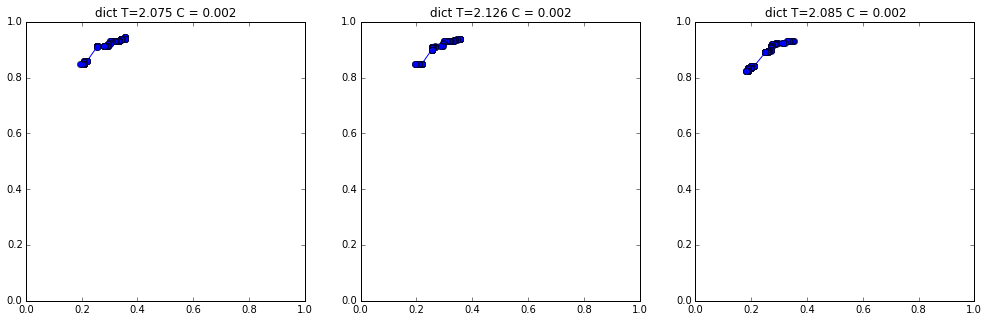

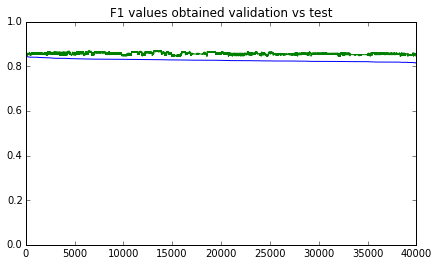

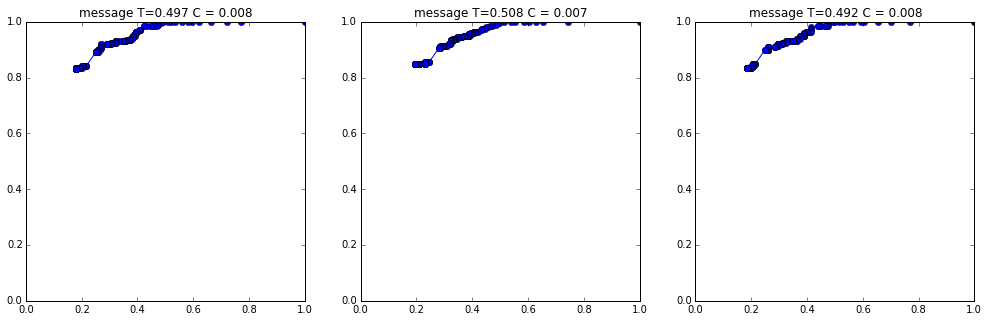

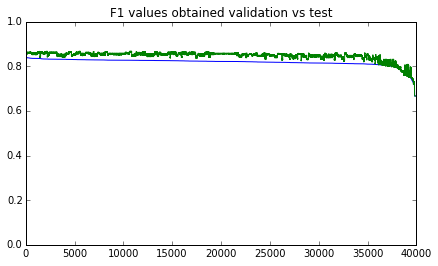

In [114]:
print 'dict-method'
T = numpy.linspace(1.,3.,200)
C = numpy.linspace(0.0,.01,200)
experiment(T,C,showF1=True,Methods=['dict'])

print 'message-method'
T = numpy.linspace(1e-10,1,200)
C = numpy.linspace(0.0,.01,200)
experiment(T,C,showF1=True,Methods=['message'])

In [96]:
T = numpy.linspace(1e-10,10.0,50)
C = numpy.linspace(1e-10,1.,50)

#T = [2.0,0.5]
#C = [0.002,0.008]

r = numpy.arange(10.) / 10

for val in r:
    print 'pHam =',val,'pSpam = ',1.-val
    experiment(T,C,showROC=False,pHam=val,pSpam=1-val)

pHam = 0.0 pSpam =  1.0
Showing some results:
Position 0  with  message T=10.000 C = 1.000  F1 = 0.67  On test: F1 = 0.67
Position 1  with  message T=3.673 C = 0.673  F1 = 0.67  On test: F1 = 0.67
Position 2  with  message T=2.245 C = 0.673  F1 = 0.67  On test: F1 = 0.67
Computed in 1 seconds for 5000 combinations
pHam = 0.1 pSpam =  0.9
Showing some results:
Position 0  with  message T=8.571 C = 0.020  F1 = 0.84  On test: F1 = 0.86
Position 1  with  message T=7.959 C = 0.020  F1 = 0.84  On test: F1 = 0.87
Position 2  with  message T=8.163 C = 0.020  F1 = 0.84  On test: F1 = 0.87
Computed in 1 seconds for 5000 combinations
pHam = 0.2 pSpam =  0.8
Showing some results:
Position 0  with  message T=3.673 C = 0.020  F1 = 0.84  On test: F1 = 0.87
Position 1  with  message T=3.878 C = 0.020  F1 = 0.83  On test: F1 = 0.86
Position 2  with  message T=3.469 C = 0.020  F1 = 0.83  On test: F1 = 0.86
Computed in 1 seconds for 5000 combinations
pHam = 0.3 pSpam =  0.7
Showing some results:
Position

Showing some results:
Position 0  with  message T=0.500 C = 0.002 #cols=16  F1 = 0.86  On test: F1 = 0.86
Position 1  with  dict T=0.500 C = 0.002 #cols=17  F1 = 0.85  On test: F1 = 0.84
Position 2  with  message T=0.500 C = 0.008 #cols=16  F1 = 0.84  On test: F1 = 0.85
Computed in 1 seconds for 8 combinations


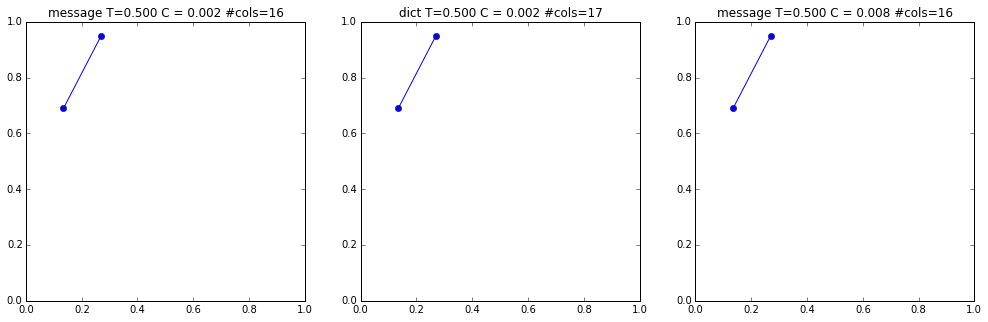

In [98]:
#column search
T = [2.0,0.5]
C = [0.002,0.008]
experiment(T,C,column_search=True)

##Part 1: Running the experiments and searching for F1 score (15P)

Using the code provided, run several experiments and answer the following question about performance. Include the experiments which support your claims and briefly explain how you came to the conclusion. It is sufficient to write four or five sentences per question. Make sure that you are examining interesting values when performing the test. For example, setting T=[1e-10,10,1e10] gives no information about performance, as only one of them can possibly return good results.

*Which values of C produce good results?*

The best results produce very small values of C, between 0.001 and 0.01.
For the 'dict' method, the best value was around 0.002, for 'message' it was around 0.008.

*Which values of T produce good results? Does it depend on the method?*

The values of T that produce good results depend on the method.
For the 'dict' method, the best T values are at around 2.0.
For the 'message' method, the best T values are at around 0.5.

*How does changing pSpam and pHam (make sure their sum is 1) change result quality?*

For a previously chosen C and T with their best values, any different values for pSpam and pHam that differ from the ones C and T were chosen upon will worsen the result. Choosing the best C and T for the different pSpam and pHam and then using those values does only slightly change the result quality.

*Does column search improve result quality? When would it be more likely to help?*

Yes, for the previously chosen C and T values, the use of column search does improve the result quality. It is more likely to help with data sets containing more samples.

Showing some results:
Position 0  with  dict T=1.668 C = 0.000  F1 = 0.82  On test: F1 = 0.86
Position 1  with  message T=0.599 C = 0.500  F1 = 0.82  On test: F1 = 0.83
Position 2  with  dict T=0.599 C = 0.000  F1 = 0.81  On test: F1 = 0.85
Computed in 1 seconds for 40 combinations
Showing some results:
Position 0  with  message T=0.215 C = 0.000 #cols=12  F1 = 0.84  On test: F1 = 0.82
Position 1  with  message T=0.599 C = 0.500 #cols=12  F1 = 0.82  On test: F1 = 0.83
Position 2  with  message T=0.599 C = 0.000 #cols=12  F1 = 0.82  On test: F1 = 0.81
Computed in 2 seconds for 20 combinations


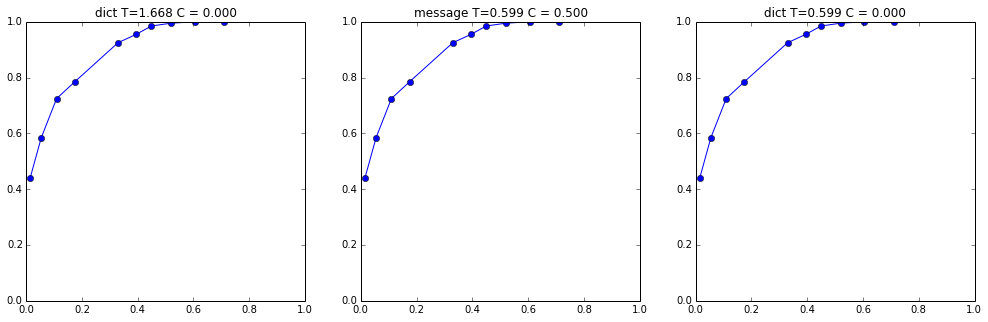

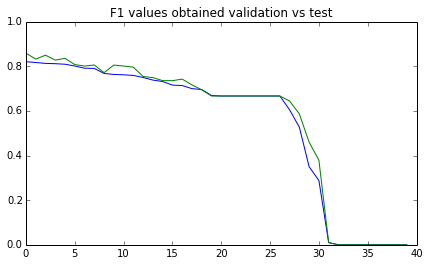

In [4]:
#To run the experiments you don't need to modify anything within the code above.
#Just select some values from T, for example using
T = numpy.logspace(-2,2,10)
C = numpy.linspace(0.,0.3,10)
# or simply
C = [0.,0.5]
# Here are some example calls
experiment(T,C,column_search=False, showF1=True)
experiment(T,C,column_search=True, showROC=False,Methods = ['message'])

# The combinations which yield the three best answers are printed out
# If you wish to look at the F1 distributions add showF1=True
# Note that column_search makes computation significantly slower, so don't focus on it too much

##Part 2: Examining result quality, choosing a model, improvements (5P)

For this part no plots/values need to be provided.

*Is the F1 score a good metric for spam detection? Are false-positives or false-negatives more problematic for the average user? When does the opposite case occur?*

Yes, it is a good metric for spam detection, because it does not take the true negatives (= not spam) into account. This is good, since e-mails are in most cases not spam, with which it would be easier to achieve a higher score with taking true negatives into account. For the average user, false negatives are more problematic, since the non-spam might contain important information the user then misses. Though, the opposite case is not unproblematic, since the user's inbox might overflow with spam, making it, again, possible to miss an important mail.

*If two parameter combinations yield identical (highest obtained) F1 scores, is there a way you can further check which one should perform better by looking at their ROC curves or accuracy measures? What would you look for?*

We can also compare the areas under the curve of the ROC and choose whichever's area is greater.


##Part 3: Proposing improvements (10P)

For the following questions you only need to give your opinion and briefly explain it. There is no right answer, just express what you think would happen.

*What other type of normalization (modify_priors) would you try? Why do you think it could potentially outperform the simple method above*

Normalize by scaling the highest occurence in the dataset to 1.0 and scale all other values by the same factor. =>   trainingSpam / max(trainingSpam).

*How would you hard-code knowledge you have about the world (e.g. you know Enron being used in the message means it's not spam) into your model by modifying the values of p(word|class)?*

Setting the value at the desired index (e.g. "Enron's index") of trainingHam right before the calculation in calculate_posterior to a very large value should ensure that no e-mail containing the desired word should be classified as spam. 


*Imagine you are provided with an additional spam detector which outperforms the simple detector we've looked at today, but is far more computationally expensive to use. How would you combine it with the simple classifier to get optimal results (better than the naive classifier but not too expensive to run)?*

We could set the threshold to a high value, such that data gets classified as spam more often (= more false positives and therefore hopefully less false negatives). Those positives we can then feed into the expensive classifier, which should divide the true from the false positives of the simple classifier.

*Consider a new classifier, in which we are interested in the number of times words are observed (no longer binary) and use more complex distributions, but the Bayes rule and the strong independence assumption are still the core of the classifier. What could these more complex methods detect better? Would you expect them to always work better?*

That classifier would detect spam messages that write the same things over and over much quicker, but would also be very vulnerable to "non-spam words" being repeated as well. To assure better classification, repetition of words should be accounted to being spam (e.g. decrease positive value with every occurence while increasing the negative value).

*You are given 10000 messages for training your classifier, which is expected to be used on a significnatly larger number of messages every day. Would you use the simple (binary) classifier or the more complex one? Why?*

The complex one should be more useful, since it does take repetition into account, especially in spam mail that might try to repeat "positive words" to pass the spam classifier. It therefore also takes more information into account than the simple one for the limited amount of 10000 words.

Please include the name of your group in the name of the ipython notebook and remove code segments which are not necessary for grading. Do not zip the notebook together with the theoretical part, as you can upload multiple files on ISIS.